<a href="https://colab.research.google.com/github/fisicorj/astrofisica/blob/main/corponegro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

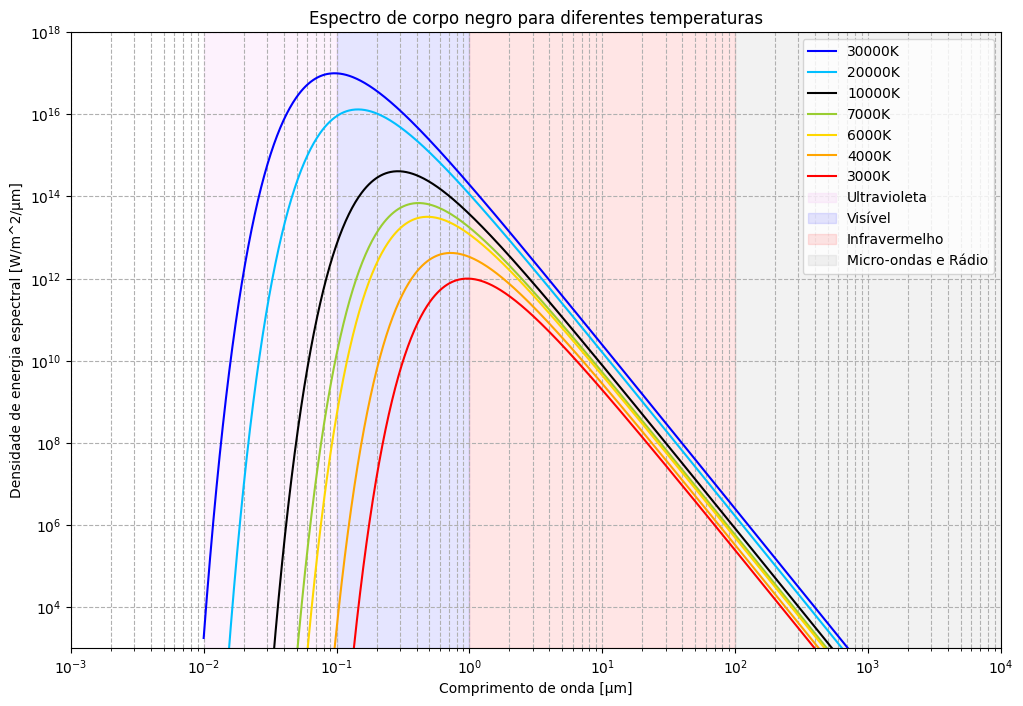

In [16]:
import numpy as np
import scipy.constants as const
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Precompute constants
C1 = 2 * const.h * const.c**2
C2 = const.h * const.c / const.k

spectral_types = {
    'O': (30000, 'Blue, He ionized (strong), heavy elements ionized (OIII, NIII, SiIV), weak H lines'),
    'B': (20000, 'Bluish, He neutral (moderate), heavy elements ionized once - Rigel (B8)'),
    'A': (10000, 'White, He neutral (very weak), ionized, H (strong) - Vega (A0) and Sirius (A1)'),
    'F': (7000, 'Yellowish, heavy elements ionized once, neutral metals (FeI, CaI), H (moderate) - Canopus (F0)'),
    'G': (6000, 'Yellow, heavy elements ionized once, neutral metals, H (relatively weak) - Sun (G2) and Alpha Cen (G2)'),
    'K': (4000, 'Orange, heavy elements ionized once, neutral metals, H (weak) - Arcturus (K2) and Aldebaran (K5)'),
    'M': (3000, 'Red, neutral atoms (strong), molecular (moderate), H (very weak) - Betelgeuse (M2)')
}

colors = {
    'O': 'blue',
    'B': 'deepskyblue',
    'A': 'black',
    'F': 'yellowgreen',
    'G': 'gold',
    'K': 'orange',
    'M': 'red'
}

def planck(wavelength, temperature):
    x = C2 / (wavelength * temperature)
    exp_term = np.exp(np.clip(x, None, 700))
    return C1 / (wavelength**5 * (exp_term - 1))

def peak_wavelength(temperature):
    return 2.8977729e-3 / temperature

def optical_emission_percentage(temperature, cache={}):
    if temperature in cache:
        return cache[temperature]
    lower_limit, upper_limit = 390e-9, 700e-9
    total_emission = integrate.quad(lambda x: planck(x, temperature), 0, 10e-6)[0]
    optical_emission = integrate.quad(lambda x: planck(x, temperature), lower_limit, upper_limit)[0]
    percentage = (optical_emission / total_emission) * 100
    cache[temperature] = percentage
    return percentage

def plot_black_body_spectrum(x_scale='log', y_scale='log'):
    wavelengths = np.logspace(-2, 4, 1000) * 1e-6  # Wavelengths from 0.01 to 10000 micrometers
    plt.figure(figsize=(12, 8))

    for spectral_type, (temperature, description) in spectral_types.items():
        intensity = planck(wavelengths, temperature)
        plt.plot(wavelengths * 1e6, intensity, label=f'{temperature}K', color=colors[spectral_type])

    plt.xlabel('Comprimento de onda [µm]')
    plt.ylabel('Densidade de energia espectral [W/m^2/µm]')
    plt.title('Espectro de corpo negro para diferentes temperaturas')
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    plt.xlim(0.001, 10000)
    plt.ylim(1e3, 1e18)
    plt.grid(True, which='both', ls='--')

    # Adding spectral regions
    plt.axvspan(0.01, 0.1, color='violet', alpha=0.1, label='Ultravioleta')
    plt.axvspan(0.1, 1, color='blue', alpha=0.1, label='Visível')
    plt.axvspan(1, 100, color='red', alpha=0.1, label='Infravermelho')
    plt.axvspan(100, 10000, color='grey', alpha=0.1, label='Micro-ondas e Rádio')

    plt.legend()
    plt.show()

def print_spectral_info():
    html_output = ""
    for spectral_type, (temperature, description) in spectral_types.items():
        peak = peak_wavelength(temperature) * 1e9
        percentage_optical = optical_emission_percentage(temperature)
        color = colors[spectral_type]
        html_output += f'<p style="color:{color};"><strong>Spectral Type {spectral_type}:</strong> Peak Wavelength = {peak:.2f} nm, Percentage of Optical Emission = {percentage_optical:.2f}%, Description: {description}</p>'
    display(HTML(html_output))

plot_black_body_spectrum(x_scale='log', y_scale='log')
print_spectral_info()


